In [1]:
import pickle
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from doctr.models import ocr_predictor
from doctr.io import DocumentFile

/Users/jpec/miniconda3/envs/work/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def load_text_detection_model(model_weight_path=None):
    model = ocr_predictor(det_arch='db_resnet50', pretrained=True)
    if not model_weight_path is None:
        model.det_predictor.model.load_weights(model_weight_path)
    return model

default_model = load_text_detection_model()
cut_fine_tuning_model = load_text_detection_model("cut_fine_tuning/weights")
fine_tuning_model = load_text_detection_model("fine_tuning_final/weights")

In [3]:
def load_image(filepath, resize=None):
    im = tf.io.read_file(filepath)
    im = tf.image.decode_png(im, channels=0)
    if resize:
        return tf.image.resize(im, resize)
    return im

In [7]:
filepath = '../../streamlit_app/tmp/canvas_file_test.png'
doc = DocumentFile.from_images(filepath)
img_arr = load_image(filepath)

res_default_model = default_model(doc)
res_cut_fine_tuning_model = cut_fine_tuning_model(doc)
res_fine_tuning_model= fine_tuning_model(doc)

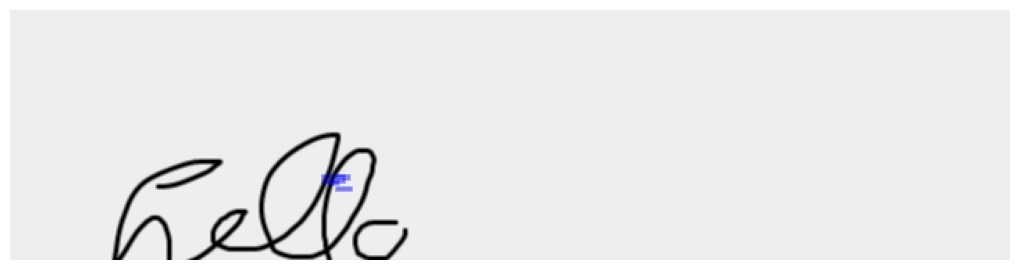

In [9]:
res_default_model.show(doc)

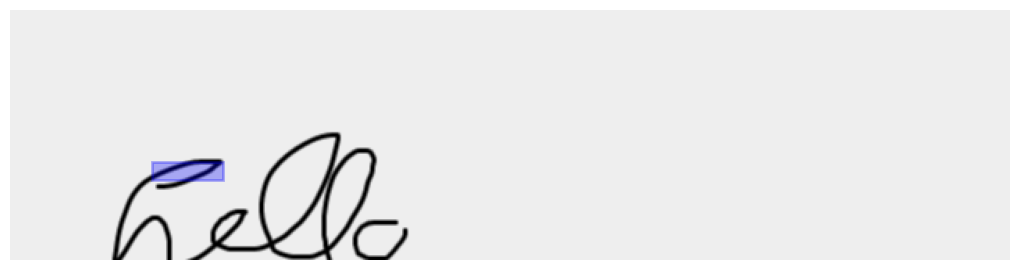

In [10]:
res_cut_fine_tuning_model.show(doc)

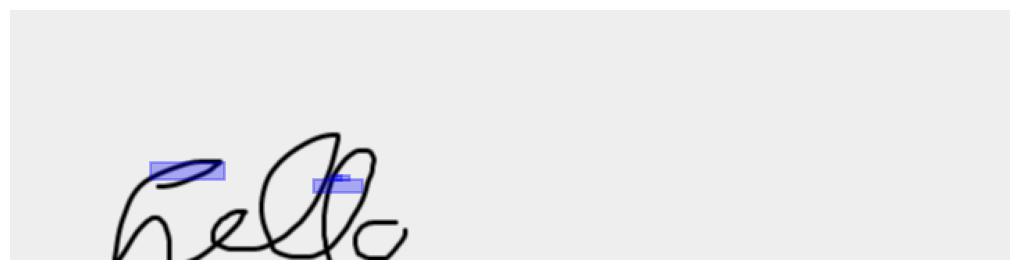

In [11]:
res_fine_tuning_model.show(doc)